In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import astropy.units as u
import plotly.express as px
import plotly.graph_objects as go
# plt.style.use('seaborn-dark')
# plt.style.context('ggplot')
# plt.style.use("dark_background")
import glob
import pandas as pd
import seaborn as sns
sns.set(style="ticks", context="talk")
import matplotlib.image as mpimg

# plt.style.use('seaborn-dark')

pd.set_option('display.max_columns', None)


# **<span style='color:Yellow'> Pre-processing </span>** 
***

## **<span style='color:Yellow'> a. Functions </span>** 
***

In [11]:
def join_1D_ifu_remove_inf_maps(lg12_csv_list, csv_filename, file_dir):

    # Make super csv file
    combo_csv_list = []
    for lg12 in lg12_csv_list:
        lg12_df = pd.read_csv(lg12)
        print(lg12, lg12_df.shape)
        combo_csv_list.append(lg12_df)
    
    # Combine csv files
    super_csv = pd.concat(combo_csv_list)
    # Replace inf value with nans
    super_csv_clean = super_csv.replace([np.inf, -np.inf], np.nan)
    new_filepath =  "{}/{}".format(file_dir, csv_filename)
    super_csv_clean.to_csv(
        path_or_buf=new_filepath,
        sep=","
    )
    
    print('New CSV filepath:', new_filepath)
    return super_csv_clean



def make_super_csv(global_db_df, csv_files_dir, super_csv_fn):
    # Combine all dataframes into a super dataframe
    super_csv_df = []
    for plateifu in global_db_df['plateifu']:
        lg12_df = pd.read_csv('{}/{}_map.csv'.format(csv_files_dir, plateifu))
        # print(plateifu, lg12_df.shape)
        super_csv_df.append(lg12_df)


    # Combine csv files
    super_csv = pd.concat(super_csv_df)
    # Replace inf value with nans
    super_csv_noinfs = super_csv.replace([np.inf, -np.inf], np.nan)
    # Make supercsv
    super_csv_noinfs.to_csv('/Users/mmckay/Desktop/research/BreakBRD_LG12_analysis_repo/2d_bbrd_lg12_maps_v5/lg12_MMfits/{}.csv'.format(super_csv_fn))

    return super_csv_noinfs

## **<span style='color:Yellow'> 1. Read CSV files of samples and replace inf values with nans </span>** 
***

In [12]:
# LG12
lg12_merged_df = pd.read_csv('/Users/mmckay/Desktop/research/BreakBRD_LG12_analysis_repo/global_merged_dat/lg12_global_db.csv')
# lg12_all_global_df = pd.read_csv('/Users/mmckay/Desktop/research/BreakBRD_LG12_analysis_repo//MM_lg12_4643_sdss_table.csv')

#BBRD
bbrd_merged_df = pd.read_csv('/Users/mmckay/Desktop/research/BreakBRD_LG12_analysis_repo/global_merged_dat/bbrd_global_db.csv')
# bbrd_all_global_df = pd.read_csv('/Users/mmckay/Desktop/research/BreakBRD_LG12_analysis_repo/MM_bbrd126_sdss_table.csv')

# Set inf values to np.nan
lg12_merged_df.replace([np.inf, -np.inf], np.nan, inplace=True)
bbrd_merged_df.replace([np.inf, -np.inf], np.nan, inplace=True)
print(len(lg12_merged_df))

# Remove duplicates rows
lg12_merged_df.drop_duplicates(subset=['plateifu'], keep=False, inplace=True)
print(len(lg12_merged_df))


274
177


In [13]:
# np.unique(lg12_merged_df.duplicated(subset=['plateifu']))

## **<span style='color:Yellow'> 2. Visually inspect SDSS images - image_inspection.py </span>** 
***

In [14]:
# Loop through the SDSS images matched with the plateifu of a given merged csv
# Extact plateifus with messy data while the current csvs keep the same name

In [15]:
# import matplotlib as mpl
# mpl.rcParams['figure.dpi'] = 200

# merged_df = lg12_merged_df
# noisy_plateifu_list = []
# for plateifu in merged_df['plateifu']:
#     print(plateifu)
#     sdss_img_path = '/Users/mmckay/Desktop/research/MM_manga_maps_FITS_CSV/lg12_sdss_images/{}.png'.format(plateifu)
#     sdss_img_array = mpimg.imread(sdss_img_path)
#     plt.imshow(sdss_img_array, origin='lower')
#     plt.show()
#     i=0
#     bad_good_user_input = input('[{}/{}]  Noisy Image?(y/n):'.format((i+1), len(merged_df['plateifu'])))
#     print(bad_good_user_input.lower, [plateifu])
#     if bad_good_user_input == 'y':
#         noisy_plateifu_list.append(plateifu)
        
#     elif bad_good_user_input == 'n':
#         pass
#     else:
#         print('wrong_input, try again')
#         break

#     plt.close()


        

    
    
#     # print(plateifu)

## **<span style='color:Yellow'> 3. Classify galaxies using BPT and label class as dataframe series</span>**
***

In [7]:
# def bpt_o3hb_n2ha_diagnostic_polyfit(
#     n2ha_sf_range=np.linspace(-2.0, 0, 200), n2ha_comp_range=np.linspace(-2.0, 0.4, 200)
# ):
#     ka03_o3ha_sf_fit = (0.61 / (n2ha_sf_range - 0.05)) + 1.3
#     ke06_o3ha_comp_fit = (0.61 / (n2ha_comp_range - 0.47)) + 1.19
#     return ka03_o3ha_sf_fit, ke06_o3ha_comp_fit


# def bpt_n2ha_2dmap(o3_5008_fluxmap, hb_fluxmap, nii6585_fluxmap, ha_fluxmap):

#     # Compute Ratios
#     o3hb_ratio_map_orig = o3_5008_fluxmap / hb_fluxmap
#     n2ha_ratio_map_orig = nii6585_fluxmap / ha_fluxmap

#     # Make copy of ratio maps
#     o3hb_ratio_map = np.log10(np.copy(o3hb_ratio_map_orig))
#     n2ha_ratio_map = np.log10(np.copy(n2ha_ratio_map_orig))

#     # Calculate the estimated value for OIII/Hbeta map from NII/Halpha
#     ka03_o3ha_sf_fit, ke06_o3ha_comp_fit = bpt_o3hb_n2ha_diagnostic_polyfit(
#         n2ha_sf_range=n2ha_ratio_map, n2ha_comp_range=n2ha_ratio_map
#     )

#     # Select Log(OIII/Hbeta) values below the sf polyfit curve
#     o3ha_sf_spaxels = np.copy(o3hb_ratio_map)
#     o3ha_sf_spaxels[o3ha_sf_spaxels >= ka03_o3ha_sf_fit] = np.nan
#     o3ha_sf_spaxels[n2ha_ratio_map >= -0.1] = np.nan

#     # Select Log(OIII/Hbeta) values above the sf polyfit curve and below the composite curves
#     o3ha_comp_spaxels = np.copy(o3hb_ratio_map)
#     o3ha_comp_spaxels[
#         o3ha_comp_spaxels == o3ha_sf_spaxels
#     ] = np.nan  # set sf classifed spaxel to nan
#     o3ha_comp_spaxels[o3ha_comp_spaxels >= ke06_o3ha_comp_fit] = np.nan
#     o3ha_comp_spaxels[n2ha_ratio_map >= 0.25] = np.nan

#     # Select Log(OIII/Hbeta) values above the comp ployfit
#     o3ha_agn_spaxels = np.copy(o3hb_ratio_map)
#     o3ha_agn_spaxels[
#         o3ha_agn_spaxels == o3ha_sf_spaxels
#     ] = np.nan  # set sf classifed spaxel to nan
#     o3ha_agn_spaxels[
#         o3ha_agn_spaxels == o3ha_comp_spaxels
#     ] = np.nan  # set sf classifed spaxel to nan

#     # SF spaxel constant map value=1
#     sf_spax_constmap = np.copy(o3ha_sf_spaxels)
#     sf_spax_constmap[o3ha_sf_spaxels > -99.0] = 1.0

#     # Composite spaxel constant map value=2
#     comp_spax_constmap = np.copy(o3ha_comp_spaxels)
#     comp_spax_constmap[o3ha_comp_spaxels > -99.0] = 2.0

#     # Composite spaxel constant map value=2
#     agn_spax_constmap = np.copy(o3ha_agn_spaxels)
#     agn_spax_constmap[o3ha_agn_spaxels > -99.0] = 3.0

#     # # BPT datacube
#     # bpt_3d_constant_map = np.dstack(
#     #     (sf_spax_constmap, comp_spax_constmap, agn_spax_constmap)
#     # )

#     # # Resolved BPT 2D map
#     # bpt_2d_constant_map = np.nansum(bpt_3d_constant_map, axis=2)
#     # bpt_2d_constant_map[bpt_2d_constant_map == 0.0] = np.nan

#     return o3hb_ratio_map, n2ha_ratio_map, o3ha_sf_spaxels, o3ha_comp_spaxels, o3ha_agn_spaxels

In [8]:
def kewley_sf_nii(log_nii_ha):
    """Star forming classification line for log([NII]/Ha)."""
    return 0.61 / (log_nii_ha - 0.05) + 1.3


def kewley_comp_nii(log_nii_ha):
    """Composite classification line for log([NII]/Ha)."""
    return 0.61 / (log_nii_ha - 0.47) + 1.19

oiii = bbrd_merged_df['OIII5007SDSSline [1e-17*erg/cm^2/s]']
hb = bbrd_merged_df['HbetaSDSSline [1e-17*erg/cm^2/s]']
nii = bbrd_merged_df['N6584SDSS [1e-17*erg/cm^2/s]']
ha = bbrd_merged_df['HalphaSDSSline [1e-17*erg/cm^2/s]']

oiii_hb = np.log10(oiii / hb)
nii_ha = np.log10(nii / ha)

In [9]:
# Calculate masked logarithms
log_oiii_hb = np.ma.masked_array(oiii_hb)
log_nii_ha = np.ma.masked_array(nii_ha)

sf_mask_nii = ((log_oiii_hb < kewley_sf_nii(log_nii_ha)) & (log_nii_ha < 0.05)).filled(False)
agn_mask_nii = ((log_oiii_hb > kewley_comp_nii(log_nii_ha)) | (log_nii_ha > 0.465)).filled(False)
comp_mask_nii = ((log_oiii_hb > kewley_sf_nii(log_nii_ha)) & (log_nii_ha < 0.05)).filled(False) & ((log_oiii_hb < kewley_comp_nii(log_nii_ha)) & (log_nii_ha < 0.465)).filled(False)



sf_spax_constmap = np.copy(log_oiii_hb)
sf_spax_constmap[sf_mask_nii == True] = 1
sf_spax_constmap[sf_mask_nii == False] = 0

agn_spax_constmap = np.copy(log_oiii_hb)
agn_spax_constmap[agn_mask_nii == True] = 3
agn_spax_constmap[agn_mask_nii == False] = 0


comp_spax_constmap = np.copy(log_oiii_hb)
comp_spax_constmap[comp_mask_nii == True] = 2
comp_spax_constmap[comp_mask_nii == False] = 0



bpt_3d_constant_map = np.dstack((sf_spax_constmap, comp_spax_constmap, agn_spax_constmap))
bpt_2d_constant_map = np.nansum(bpt_3d_constant_map, axis=2)

# np.unique(sf_mask_nii)
bbrd_merged_df['Log_OIII/Hb'] = log_oiii_hb
bbrd_merged_df['Log_NII/Ha'] = log_nii_ha

# Masking
bbrd_merged_df['BPT_SF_class'] = sf_mask_nii
bbrd_merged_df['BPT_COMP_class'] = comp_mask_nii
bbrd_merged_df['BPT_AGN_class'] = agn_mask_nii
# bbrd_merged_df['allBPT_class'] = bpt_2d_constant_map[0]




In [10]:
bpt_3d_constant_map

array([[[1., 0., 0.],
        [0., 2., 0.],
        [1., 0., 0.],
        [0., 2., 0.],
        [0., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 2., 0.],
        [0., 2., 0.],
        [0., 0., 3.],
        [1., 0., 0.]]])

In [11]:
bpt_3d_constant_map = np.dstack((sf_spax_constmap, comp_spax_constmap, agn_spax_constmap))
bpt_2d_constant_map = np.nansum(bpt_3d_constant_map, axis=2)
bpt_2d_constant_map[0]

array([1., 2., 1., 2., 0., 1., 1., 1., 1., 1., 2., 2., 3., 1.])

In [ ]:
fig, (ax0) = plt.subplots(1, 1, figsize=(12, 8), sharey=True)
# sns.scatterplot(data=bbrd_merged_df, x=bbrd_merged_df['Log_NII/Ha'], y=bbrd_merged_df['Log_OIII/Hb'], ax=ax0, hue=bbrd_merged_df['allBPT_class'])
# sns.scatterplot(data=bbrd_merged_df, x=bbrd_merged_df['Log_NII/Ha'], y=bbrd_merged_df['Log_OIII/Hb'], ax=ax0)
sns.scatterplot(data=bbrd_merged_df, x=bbrd_merged_df['Log_NII/Ha'], y=bbrd_merged_df['Log_OIII/Hb'], ax=ax0, hue=bbrd_merged_df['BPT_COMP_class'])
# sns.scatterplot(data=lg12_merged_df, x=lg12_merged_df['Log_NII/Ha'], y=lg12_merged_df['Log_OIII/Hb'], ax=ax0, hue=lg12_merged_df['BPT_COMP_class'])

# sns.scatterplot(data=bbrd_merged_df, x=bbrd_merged_df['Log_NII/Ha'], y=bbrd_merged_df['Log_OIII/Hb'], ax=ax0, hue=bbrd_merged_df['BPT_AGN_class'])


# plt.xscale('log')
# ax0.plot(n2ha_sf_range, ka03_comp, color='green', label='ka03')
# ax0.plot(n2ha_comp_range, ke01_sf, color='red', label='ke01')
# ax0.scatter(x=bbrd_merged_df['LOG([NII]/Ha)'], y=bbrd_merged_df['LOG([OIII]/Hb)'], color='black', s=3, alpha=0.5, label='# agn: {}'.format(len(bbrd_merged_df)))
# ax0.scatter(x=bbrd_merged_df['LOG([NII]/Ha)'], y=bbrd_merged_df['BPT_o3ha_SF'], color='blue', s=3, alpha=0.5, label='# agn: {}'.format(len(bbrd_merged_df['BPT_o3ha_SF'])))
# ax0.scatter(x=bbrd_merged_df['LOG([NII]/Ha)'], y=bbrd_merged_df['BPT_o3ha_Comp'], color='green', s=3, alpha=0.5, label='# agn: {}'.format(len(lg12_merged_df['BPT_o3ha_Comp'])))

# # ax0.scatter(lg12_merged_df_sf['LOG([NII]/Ha)'], lg12_merged_df_sf['OIII/Hbeta'], color='blue', s=3, alpha=0.5, label='# sf/comp: {}'.format(len(lg12_merged_df_sf)))
n2ha_sf_range = np.linspace(-2.0, 0.05, int(1e4))
n2ha_comp_range = np.linspace(-2.0, 0.465, int(1e4))
ke01_sf = kewley_sf_nii(n2ha_sf_range)
ka03_comp = kewley_comp_nii(n2ha_comp_range)


ax0.plot(n2ha_sf_range, ke01_sf, color='blue')
ax0.plot(n2ha_comp_range, ka03_comp, color='green')
ax0.set_xlim(-2.0, 0.5)
ax0.set_ylim(-2.0, 1.0)
ax0.tick_params(axis='x', labelsize=18)
ax0.tick_params(axis='y', labelsize=18)
ax0.grid(True)
ax0.set_xlabel(r'$Log([NII]/H\alpha)$', fontsize=18)
ax0.set_ylabel(r'$Log([OIII]/H\beta)$', fontsize=18)

In [ ]:
fig = px.scatter(data_frame=bbrd_merged_df, x='Log_NII/Ha', y='Log_OIII/Hb', text='plateifu', color="allBPT_class")
fig.update_traces(textposition="bottom right")
fig.show()

# **<span style='color:Green'> Post-processing </span>**
***

## **<span style='color:Green'> Seperate SF and Quenching using Dn4000</span>**
***

In [7]:
lg12_merged_df.columns

Index(['plateifu', 'Unnamed: 0_x', 'Objra', 'Objdec', 'mangaid_x',
       'plateifu.1', 'nsa_z', 'SDSS_RA_deg', 'SDSS_DEC_deg', 'SDSS_z',
       ...
       'P(Sd)', 'P(Sdm)', 'P(Sm)', 'P(Irr)', 'best_type_n', 'best_type',
       'nsa_nsaid', 'Vmax_w', 'Num_w', 'QCFLAG'],
      dtype='object', length=608)

In [16]:
# Seperate SF and QC galaxies using Dn40000 global measurements
sf_lg12_global_df = lg12_merged_df[(lg12_merged_df['Dn4000SDSSindx '] <= 1.5)]
qc_lg12_global_df = lg12_merged_df[(lg12_merged_df['Dn4000SDSSindx '] >= 1.75)]

# Save global data as CSV
sf_lg12_global_df.to_csv('/Users/mmckay/Desktop/research/BreakBRD_LG12_analysis_repo/lg12_dn4000cut_sf_qc_superdf/sf_lg12_global_df.csv')
qc_lg12_global_df.to_csv('/Users/mmckay/Desktop/research/BreakBRD_LG12_analysis_repo/lg12_dn4000cut_sf_qc_superdf/qc_lg12_global_df.csv')

print('CQC # {}'.format(len(qc_lg12_global_df)))
print('CSF # {}'.format(len(sf_lg12_global_df)))


CQC # 61
CSF # 89


## **<span style='color:Green'> Make sample super CSV</span>**
***

In [8]:
# Make supercsv of for cut files
qc_lg12_supercsv_df = make_super_csv(qc_lg12_global_df, '/Users/mmckay/Desktop/research/BreakBRD_LG12_analysis_repo/2d_bbrd_lg12_maps_v5/lg12_MMfits/', 'qc_dn4000_lg12_df')
sf_lg12_supercsv_df = make_super_csv(sf_lg12_global_df, '/Users/mmckay/Desktop/research/BreakBRD_LG12_analysis_repo/2d_bbrd_lg12_maps_v5/lg12_MMfits/', 'sf_dn4000_lg12_df')


In [10]:
sf_lg12_supercsv_df

,Unnamed: 0.1,Unnamed: 0,HALPHA,HALPHA KCORR,HBETA KCORR,NII6585 KCORR,OII3727 KCORR,OII3729 KCORR,OIII5008 KCORR,SII6718 KCORR,SII6732 KCORR,HALPHA SNR,HBETA SNR,NII6585 SNR,OII3727 SNR,OII3729 SNR,OIII5008 SNR,SII6718 SNR,SII6732 SNR,HALPHA ERROR,HBETA ERROR,NII6585 ERROR,OII3727 ERROR,OII3729 ERROR,OIII5008 ERROR,SII6718 ERROR,SII6732 ERROR,HALPHA_DQ,HA/HB,HA_LUM,LOGSFR,LOGSFR DENSITY,ELLIP R,R/REFF,LOG(O/H)+12_[N2O2],LOG(O/H)+12_[O3N2],LOG(O/H)+12_[N2],GYR_LW,GYR_MW,GYR_ERR,SP_ZSUBL,SP_ZSUBM,SP_ZERR,VEL_KM/S,VEL_ERR],VDISP_KM/S,VDISP_ERR,M/L,MSUN/SPX2,MSUN/ARCS2,MSUN_ERR,D4000,D4000_ERR,HDELTA,HDELTA_ERR,O3HB_RATIO,N2HA_RATIO,BPT_CLASS,B20_DELTASFR,LOG_SIGMA_SSFR,B20_SFRD_UPLIM,B20_SFRD_LOWLIM,DAP_D4000,DAP_DN4000,DAP_HDELTAA,DAP_HDELTAF,DAP_D4000_IVAR,DAP_DN4000_IVAR,DAP_HDELTAA_IVAR,DAP_HDELTAF_IVAR,R_KPC,GASVEL_DISP,GASVEL_ERR_DISP,STARVEL_DISP1,STARVEL_DISP2,Log_Sigma_sSFR_yr-1
0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1073741840,NaN,NaN,NaN,NaN,15.560588,3.658655,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.019841,NaN,NaN,NaN,NaN,NaN
1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1073741840,NaN,NaN,NaN,NaN,15.209065,3.576004,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.838669,NaN,NaN,NaN,NaN,NaN
2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1073741840,NaN,NaN,NaN,NaN,14.867092,3.495598,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.662417,NaN,NaN,NaN,NaN,NaN
3,3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1073741840,NaN,NaN,NaN,NaN,14.535342,3.417596,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.491435,NaN,NaN,NaN,NaN,NaN
4,4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1073741840,NaN,NaN,NaN,NaN,14.214532,3.342166,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.326092,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2911,2911,2911,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1073741840,NaN,NaN,NaN,NaN,18.505478,3.091671,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.028249,NaN,NaN,NaN,NaN,NaN
2912,2912,2912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1073741840,NaN,NaN,NaN,NaN,18.757277,3.133739,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.205521,NaN,NaN,NaN,NaN,NaN
2913,2913,2913,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1073741840,NaN,NaN,NaN,NaN,19.019762,3.177592,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.390316,NaN,NaN,NaN,NaN,NaN
2914,2914,2914,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1073741840,NaN,NaN,NaN,NaN,19.292498,3.223157,Na

In [ ]:
# fig, ((ax0, ax1, ax2)) = plt.subplots(1,3, figsize=(20,8), dpi=150)

# # Ax0
# # sns.distplot(lg12_merged_df['sSFR_med_all '], bins=35, label=r'LG12 Median $Log(sSFR[yr^{-1}])$', ax=ax0, color='darkred', kde=False, hist_kws={"histtype": "step", "linewidth": 3})
# sns.distplot(sf_lg12_merged_df['sSFR_med_all '], bins=35, label='LG12 SF', ax=ax0, color='Blue', kde=False, hist_kws={"histtype": "step", "linewidth": 3})
# sns.distplot(qc_lg12_merged_df['sSFR_med_all '], bins=35, label=r'LG12 QC $Log(sSFR[yr^{-1}]) > 1.5$', ax=ax0, color='Red', kde=False, hist_kws={"histtype": "step", "linewidth": 3})
# sns.distplot(bbrd_merged_df['sSFR_med_all '], bins=5, label=r'BBRD Median $Log(sSFR[yr^{-1}]) < 1.75$', ax=ax0, color='orange', kde=False, hist_kws={"histtype": "stepfilled", "linewidth": 3, "alpha": 1, "linestyle":"--"})

# ax0.grid(True)
# ax0.tick_params(axis='x', labelsize=18)
# ax0.tick_params(axis='y', labelsize=18)
# ax0.set_ylabel('N', fontsize=18)
# ax0.set_xlabel(r'SDSS Central Fiber $Log(sSFR[yr^{-1}])$', fontsize=18)
# # ax0.axvline(-10.5, color='black', linestyle='-.', linewidth=3, label="Blue Cload Cut")
# # ax0.axvline(-11.25, color='black', linestyle='-.', linewidth=3, label="Red Cload Cut")
# ax0.legend(ncol=1)

# # Ax1
# # sns.distplot(lg12_merged_df['Dn4000SDSSindx '], bins=35, label=r'LG12 Median $Log(sSFR[yr^{-1}])$', ax=ax1, color='darkred', kde=False, hist_kws={"histtype": "step", "linewidth": 3})
# sns.distplot(sf_lg12_merged_df['Dn4000SDSSindx '], bins=35, label=r'LG12 Median $D_{n}4000$', ax=ax1, color='blue', kde=False, hist_kws={"histtype": "step", "linewidth": 3})
# sns.distplot(qc_lg12_merged_df['Dn4000SDSSindx '], bins=35, label=r'LG12 Median $D_{n}4000$', ax=ax1, color='red', kde=False, hist_kws={"histtype": "step", "linewidth": 3})
# sns.distplot(bbrd_merged_df['Dn4000SDSSindx '], bins=5, label=r'BBRD Median $D_{n}4000$', ax=ax1, color='orange', kde=False, hist_kws={"histtype": "stepfilled", "linewidth": 3, "alpha": 1, "linestyle":"--"})

# ax1.grid(True)
# ax1.tick_params(axis='x', labelsize=18)
# ax1.tick_params(axis='y', labelsize=18)
# ax1.set_ylabel('N', fontsize=18)
# ax1.set_xlabel(r'SDSS Central Fiber $D_{n}4000$', fontsize=18)
# ax1.axvline(1.5, color='black', linestyle='-.', linewidth=3, label="Blue Cload Cut")
# ax1.axvline(1.75, color='black', linestyle='-.', linewidth=3, label="Red Cload Cut")
# # ax1.legend(ncol=1)


# # ax2
# # sns.distplot(lg12_merged_df['fibSFR_med_all'], bins=35, label=r'LG12 Median $Log(SFR[M_{\odot}/yr^{-1}])$', ax=ax2, color='darkred', kde=False, hist_kws={"histtype": "step", "linewidth": 3})
# sns.distplot(sf_lg12_merged_df['fibSFR_med_all'], bins=35, label=r'LG12 Median $Log(SFR[M_{\odot}/yr^{-1}])$', ax=ax2, color='blue', kde=False, hist_kws={"histtype": "step", "linewidth": 3})
# sns.distplot(qc_lg12_merged_df['fibSFR_med_all'], bins=35, label=r'LG12 Median $Log(SFR[M_{\odot}/yr^{-1}])$', ax=ax2, color='red', kde=False, hist_kws={"histtype": "step", "linewidth": 3})
# sns.distplot(bbrd_merged_df['fibSFR_med_all'], bins=5, label=r'BBRD Median $Log(SFR[M_{\odot}/yr^{-1}])$', ax=ax2, color='orange', kde=False, hist_kws={"histtype": "stepfilled", "linewidth": 3, "alpha": 1, "linestyle":"--"})

# ax2.grid(True)
# ax2.tick_params(axis='x', labelsize=18)
# ax2.tick_params(axis='y', labelsize=18)
# ax2.set_ylabel('N', fontsize=18)
# ax2.set_xlabel(r'SDSS Central Fiber $Log(SFR[M_{\odot}/yr^{-1}])$', fontsize=18)
# # ax2.axvline(-0.75, color='black', linestyle='-.', linewidth=3, label="Blue Cload Cut")
# # ax2.axvline(-1.5, color='black', linestyle='-.', linewidth=3, label="Red Cload Cut")
# # ax2.axvspan(-1.5, -0.6)
# # ax2.legend(ncol=1)
# plt.tight_layout()

# Radial profile of LG12 SF and QC Dn4000, sSFR, SFR radial profiles

/Users/mmckay/conda/envs/astrococnda3_10/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/mmckay/conda/envs/astrococnda3_10/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/mmckay/conda/envs/astrococnda3_10/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot`

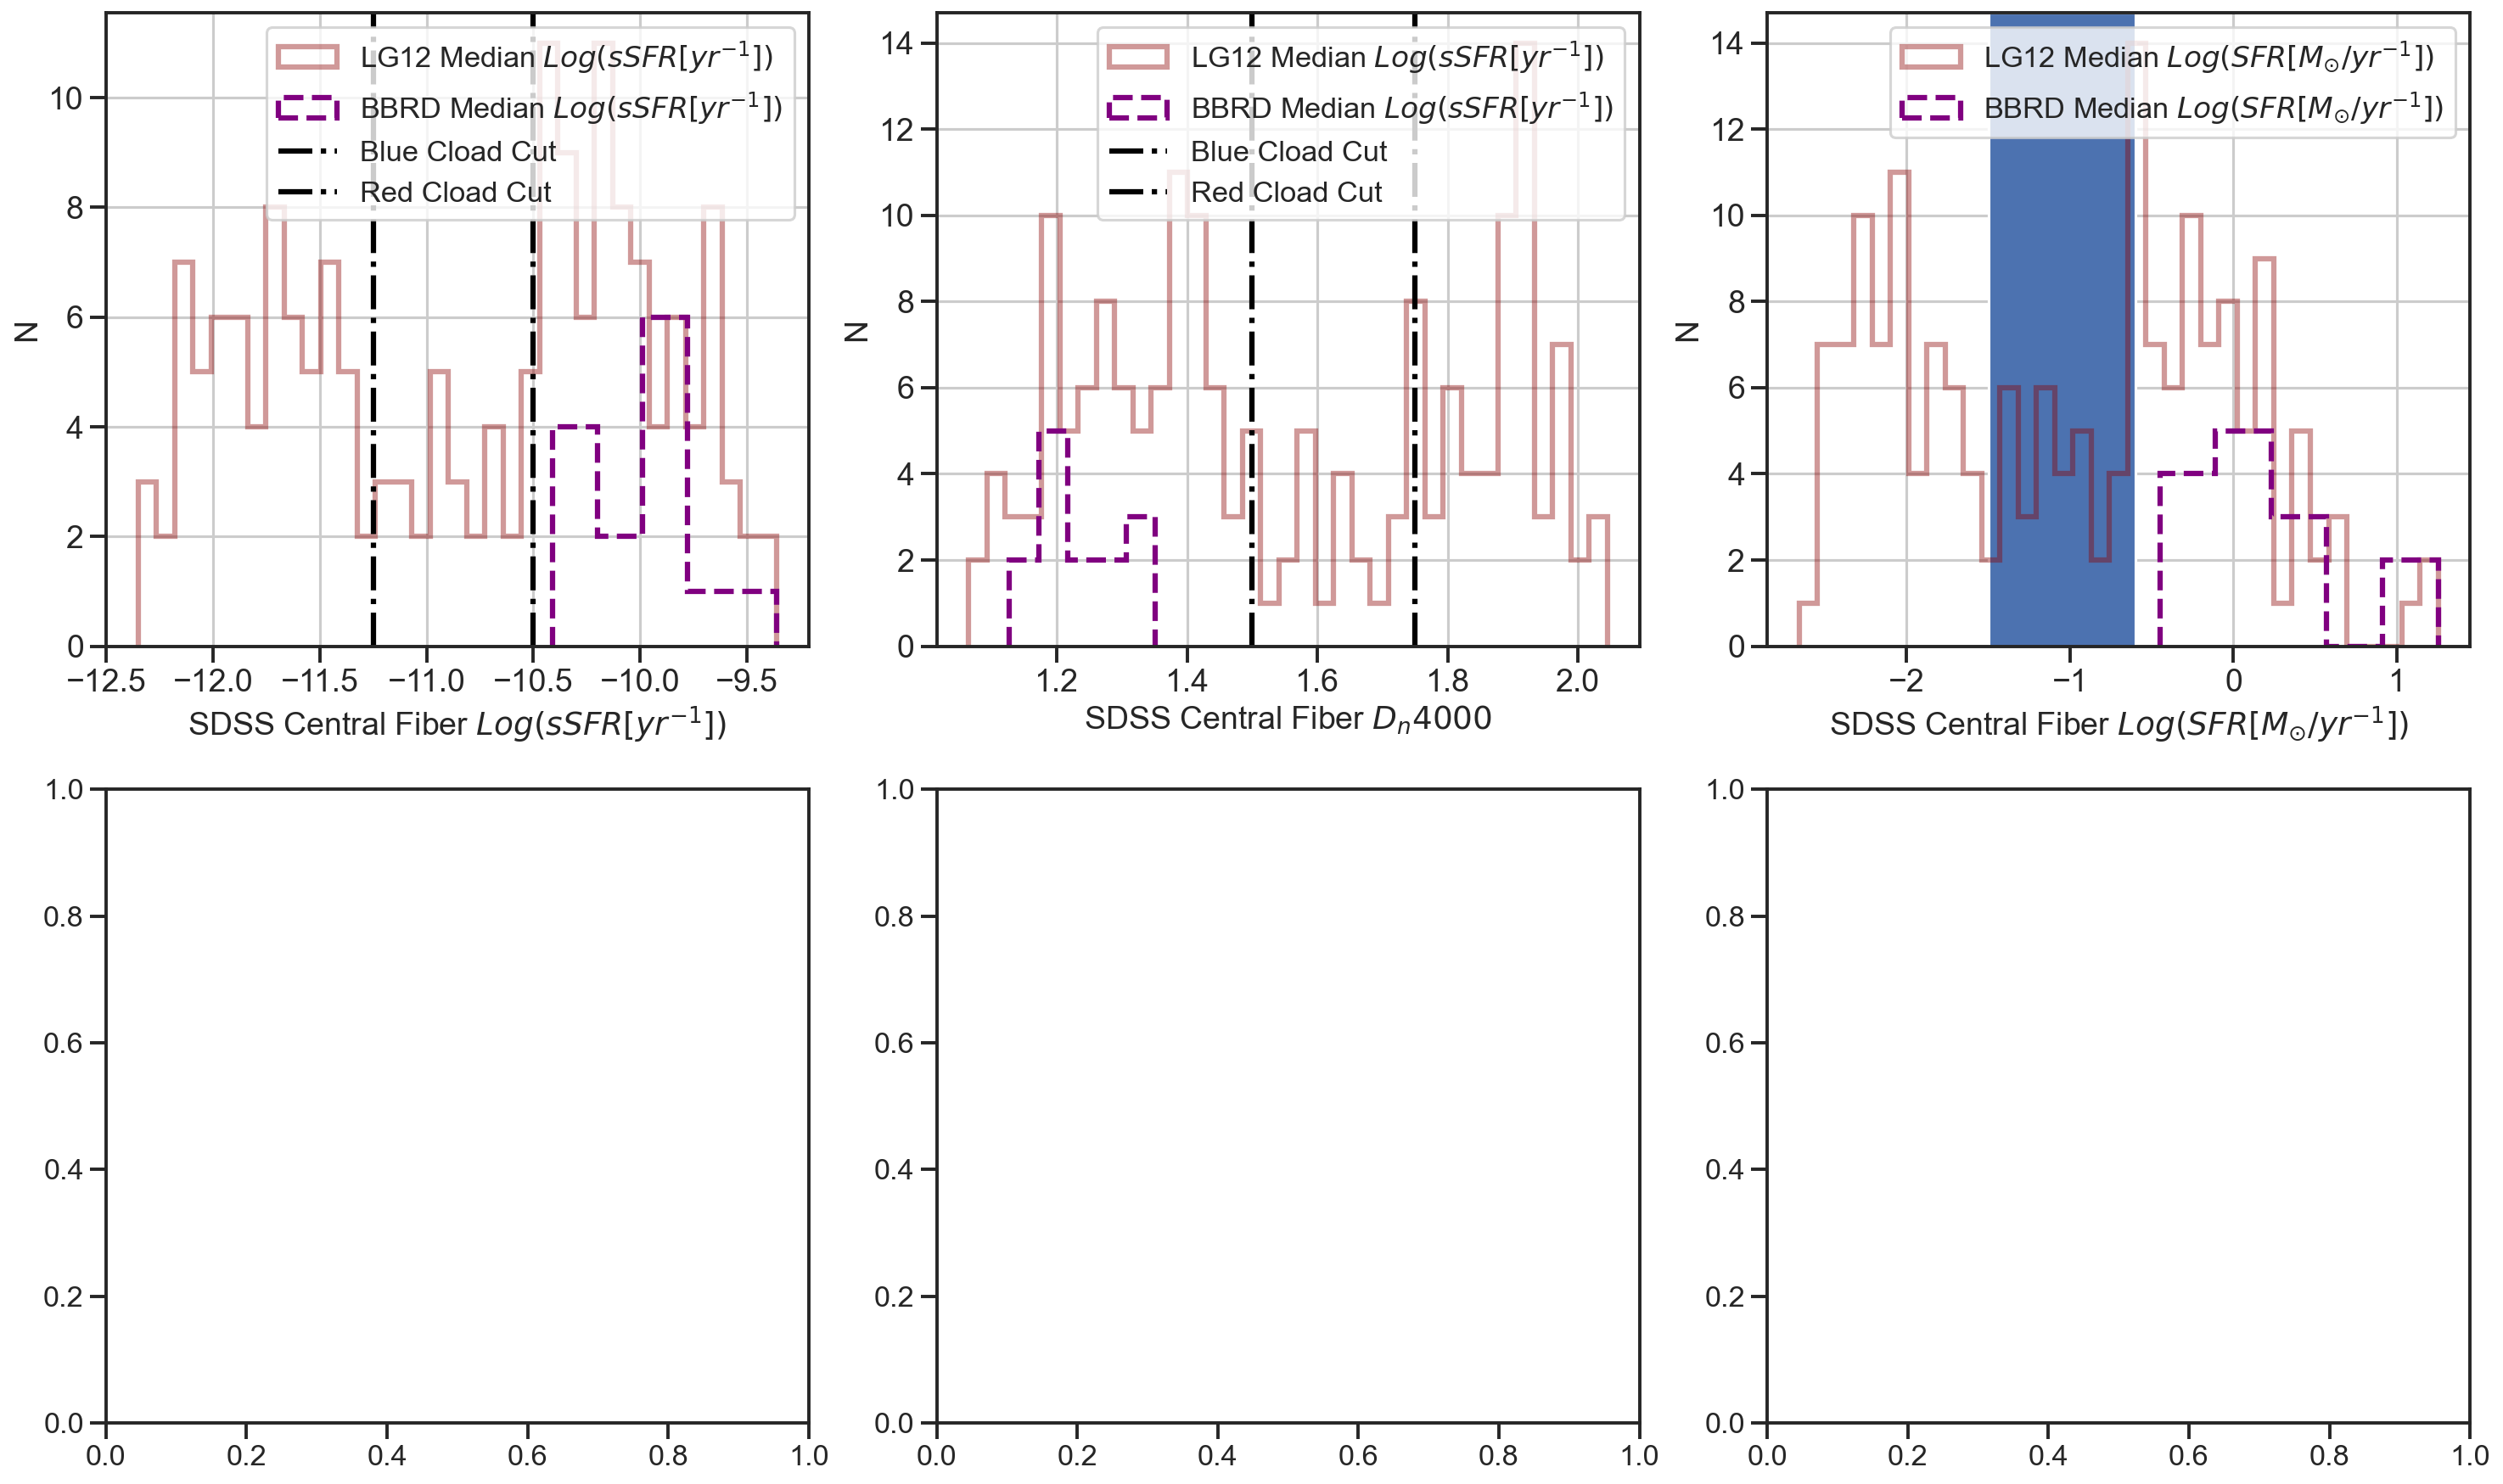

In [ ]:
fig, ((ax0, ax1, ax2),(ax3, ax4, ax5)) = plt.subplots(2,3, figsize=(20,12), dpi=150)

# Ax0
sns.distplot(lg12_merged_df['sSFR_med_all '], bins=35, label=r'LG12 Median $Log(sSFR[yr^{-1}])$', ax=ax0, color='darkred', kde=False, hist_kws={"histtype": "step", "linewidth": 3})
sns.distplot(bbrd_merged_df['sSFR_med_all '], bins=5, label=r'BBRD Median $Log(sSFR[yr^{-1}])$', ax=ax0, color='purple', kde=False, hist_kws={"histtype": "step", "linewidth": 3, "alpha": 1, "linestyle":"--"})

ax0.grid(True)
ax0.tick_params(axis='x', labelsize=18)
ax0.tick_params(axis='y', labelsize=18)
ax0.set_ylabel('N', fontsize=18)
ax0.set_xlabel(r'SDSS Central Fiber $Log(sSFR[yr^{-1}])$', fontsize=18)
ax0.axvline(-10.5, color='black', linestyle='-.', linewidth=3, label="Blue Cload Cut")
ax0.axvline(-11.25, color='black', linestyle='-.', linewidth=3, label="Red Cload Cut")
ax0.legend(ncol=1)

# Ax1
sns.distplot(lg12_merged_df['Dn4000SDSSindx '], bins=35, label=r'LG12 Median $Log(sSFR[yr^{-1}])$', ax=ax1, color='darkred', kde=False, hist_kws={"histtype": "step", "linewidth": 3})
sns.distplot(bbrd_merged_df['Dn4000SDSSindx '], bins=5, label=r'BBRD Median $Log(sSFR[yr^{-1}])$', ax=ax1, color='purple', kde=False, hist_kws={"histtype": "step", "linewidth": 3, "alpha": 1, "linestyle":"--"})

ax1.grid(True)
ax1.tick_params(axis='x', labelsize=18)
ax1.tick_params(axis='y', labelsize=18)
ax1.set_ylabel('N', fontsize=18)
ax1.set_xlabel(r'SDSS Central Fiber $D_{n}4000$', fontsize=18)
ax1.axvline(1.5, color='black', linestyle='-.', linewidth=3, label="Blue Cload Cut")
ax1.axvline(1.75, color='black', linestyle='-.', linewidth=3, label="Red Cload Cut")
ax1.legend(ncol=1)


# ax2
sns.distplot(lg12_merged_df['fibSFR_med_all'], bins=35, label=r'LG12 Median $Log(SFR[M_{\odot}/yr^{-1}])$', ax=ax2, color='darkred', kde=False, hist_kws={"histtype": "step", "linewidth": 3})
sns.distplot(bbrd_merged_df['fibSFR_med_all'], bins=5, label=r'BBRD Median $Log(SFR[M_{\odot}/yr^{-1}])$', ax=ax2, color='purple', kde=False, hist_kws={"histtype": "step", "linewidth": 3, "alpha": 1, "linestyle":"--"})

ax2.grid(True)
ax2.tick_params(axis='x', labelsize=18)
ax2.tick_params(axis='y', labelsize=18)
ax2.set_ylabel('N', fontsize=18)
ax2.set_xlabel(r'SDSS Central Fiber $Log(SFR[M_{\odot}/yr^{-1}])$', fontsize=18)
# ax2.axvline(-0.75, color='black', linestyle='-.', linewidth=3, label="Blue Cload Cut")
# ax2.axvline(-1.5, color='black', linestyle='-.', linewidth=3, label="Red Cload Cut")
ax2.axvspan(-1.5, -0.6)
ax2.legend(ncol=1)

plt.tight_layout()

# **<span style='color:Red'> Extract AGN classified galaxes to a new DataFrame </span>** 
***

In [ ]:
# # Assign gloabl fiber fluxs to variables
# lg12_o3_5008_fluxmap = lg12_merged_df['OIII5007SDSSline [1e-17*erg/cm^2/s]']
# lg12_hb_fluxmap = lg12_merged_df['HbetaSDSSline [1e-17*erg/cm^2/s]']
# lg12_nii6585_fluxmap = lg12_merged_df['N6584SDSS [1e-17*erg/cm^2/s]']
# lg12_ha_fluxmap = lg12_merged_df['HalphaSDSSline [1e-17*erg/cm^2/s]']

# # Run BPT function on dataframe
# lg12_o3hb_ratio_map, lg12_n2ha_ratio_map, lg12_o3ha_sf_spaxels, lg12_o3ha_comp_spaxels, lg12_o3ha_agn_spaxels = bpt_n2ha_2dmap(lg12_o3_5008_fluxmap, lg12_hb_fluxmap, lg12_nii6585_fluxmap, lg12_ha_fluxmap)

# # Add ratios to pandas dataframe
# lg12_merged_df['LOG([NII]/Ha)'] = lg12_n2ha_ratio_map
# lg12_merged_df['LOG([OIII]/Hb)'] = lg12_o3hb_ratio_map

# # SF galaxies values column where nan values are a different class
# lg12_merged_df['BPT_o3ha_SF'] = lg12_o3ha_sf_spaxels
# lg12_merged_df['BPT_o3ha_Comp'] = lg12_o3ha_comp_spaxels
# lg12_merged_df['BPT_o3ha_AGN'] = lg12_o3ha_agn_spaxels



In [ ]:
# lg12_merged_df[['BPT_o3ha_SF', 'BPT_o3ha_Comp', 'BPT_o3ha_AGN']].describe()

In [ ]:
# fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 8), sharey=True)
# # ax0.plot(n2ha_sf_range, ka03_comp, color='green', label='ka03')
# # ax0.plot(n2ha_comp_range, ke01_sf, color='red', label='ke01')
# ax0.scatter(lg12_merged_df['LOG([NII]/Ha)'], lg12_merged_df['LOG([OIII]/Hb)'], color='black', s=3, alpha=0.5, label='# agn: {}'.format(len(lg12_merged_df)))
# ax0.scatter(lg12_merged_df['LOG([NII]/Ha)'], lg12_merged_df['BPT_o3ha_SF'], color='blue', s=3, alpha=0.5, label='# agn: {}'.format(len(lg12_merged_df['BPT_o3ha_SF'])))
# ax0.scatter(lg12_merged_df['LOG([NII]/Ha)'], lg12_merged_df['BPT_o3ha_Comp'], color='green', s=3, alpha=0.5, label='# agn: {}'.format(len(lg12_merged_df['BPT_o3ha_Comp'])))

# # ax0.scatter(lg12_merged_df_sf['LOG([NII]/Ha)'], lg12_merged_df_sf['OIII/Hbeta'], color='blue', s=3, alpha=0.5, label='# sf/comp: {}'.format(len(lg12_merged_df_sf)))
# n2ha_sf_range = np.linspace(-2.0, 0.045, int(1e4))
# n2ha_comp_range = np.linspace(-2.0, 0.4, int(1e4))
# ka03_comp = (0.61 / (n2ha_sf_range - 0.05)) + 1.3
# ke01_sf = (0.61 / (n2ha_comp_range - 0.47)) + 1.19
# ax0.plot(n2ha_sf_range, ke01_sf, color='green')
# ax0.plot(n2ha_comp_range, ka03_comp, color='teal')
# ax0.set_xlim(-1, 0.5)
# ax0.set_ylim(-1.5, 1.0)
# ax0.tick_params(axis='x', labelsize=18)
# ax0.tick_params(axis='y', labelsize=18)
# ax0.grid(True)
# ax0.set_xlabel(r'$Log([NII]/H\alpha)$', fontsize=18)
# ax0.set_ylabel(r'$Log([OIII]/H\beta)$', fontsize=18)

In [ ]:
# 


In [ ]:
# np.nanmean(lg12_o3ha_sf_spaxels)
# len(lg12_o3ha_sf_spaxels)

In [ ]:
# # BPT ratios variables
# # NII/Halpha and OIII/Hbeta kcorr
# lg12_merged_df_n2ha_ratio = np.log10(lg12_merged_df['N6584SDSS [1e-17*erg/cm^2/s]'] / lg12_merged_df['HalphaSDSSline [1e-17*erg/cm^2/s]'])
# lg12_merged_df_o3hb_ratio = np.log10(lg12_merged_df['OIII5007SDSSline [1e-17*erg/cm^2/s]'] / lg12_merged_df['HbetaSDSSline [1e-17*erg/cm^2/s]'])

# # bbrd_n2ha_ratio = np.log10(bbrd['HalphaSDSSline [1e-17*erg/cm^2/s]'] / bbrd['HalphaSDSSline [1e-17*erg/cm^2/s]'])
# # bbrd_o3hb_ratio = np.log10(bbrd['OIII5007_kcorr'] / bbrd['Hbeta_kcorr'])

# # Add to pandas dataframe
# lg12_merged_df['NII/Halpha'] = lg12_merged_df_n2ha_ratio
# lg12_merged_df['OIII/Hbeta'] = lg12_merged_df_o3hb_ratio

# # bbrd['NII/Halpha'] = bbrd_n2ha_ratio
# # bbrd['OIII/Hbeta'] = bbrd_o3hb_ratio

In [ ]:
# Label the sf, comp, agn dataframe
# lg12_merged_df['LOG([NII]/Ha)'] 
# lg12_merged_df['LOG([OIII]/Hb)']
lg12_merged_df_agn_mask = (lg12_merged_df['LOG([OIII]/Hb)'] > (0.61 / (lg12_merged_df['LOG([NII]/Ha)']  - 0.47)) + 1.19) | (lg12_merged_df['NII/Halpha']>0.3)
lg12_merged_df_agn = lg12_merged_df[lg12_merged_df_agn_mask]
lg12_merged_df_sf = lg12_merged_df[~lg12_merged_df_agn_mask]

# bbrd_agn_mask = bbrd['OIII/Hbeta'] > (0.61 / (bbrd['NII/Halpha'] - 0.47)) + 1.19
# bbrd_agn = bbrd[bbrd_agn_mask]
# bbrd_sf = bbrd[~bbrd_agn_mask]

In [ ]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 8), sharey=True)
# ax0.plot(n2ha_sf_range, ka03_comp, color='green', label='ka03')
# ax0.plot(n2ha_comp_range, ke01_sf, color='red', label='ke01')
ax0.scatter(lg12_merged_df_agn['NII/Halpha'], lg12_merged_df_agn['OIII/Hbeta'], color='red', s=3, alpha=0.5, label='# agn: {}'.format(len(lg12_merged_df_agn)))
ax0.scatter(lg12_merged_df_sf['NII/Halpha'], lg12_merged_df_sf['OIII/Hbeta'], color='blue', s=3, alpha=0.5, label='# sf/comp: {}'.format(len(lg12_merged_df_sf)))
# ax0.scatter(lg12_merged_df_sf['NII/Halpha'], lg12_merged_df_sf['OIII/Hbeta'], color='blue', s=3, alpha=0.5, label='# sf/comp: {}'.format(len(lg12_merged_df_sf)))
n2ha_sf_range = np.linspace(-2.0, 0.045, int(1e4))
n2ha_comp_range = np.linspace(-2.0, 0.4, int(1e4))
ka03_comp = (0.61 / (n2ha_sf_range - 0.05)) + 1.3
ke01_sf = (0.61 / (n2ha_comp_range - 0.47)) + 1.19
ax0.plot(n2ha_sf_range, ke01_sf, color='blue')
ax0.plot(n2ha_comp_range, ka03_comp, color='teal')
ax0.set_xlim(-1, 0.5)
ax0.set_ylim(-1.5, 1.0)
ax0.tick_params(axis='x', labelsize=18)
ax0.tick_params(axis='y', labelsize=18)
ax0.grid(True)
ax0.set_xlabel(r'$Log([NII]/H\alpha)$', fontsize=18)
ax0.set_ylabel(r'$Log([OIII]/H\beta)$', fontsize=18)


# ax1.plot(n2ha_sf_range, ka03_comp, color='green', label='ka03')
# ax1.plot(n2ha_comp_range, ke01_sf, color='red', label='ke01')
# ax1.scatter(bbrd_agn['NII/Halpha'], bbrd_agn['OIII/Hbeta'], color='red', s=3, alpha=0.5, label='# agn: {}'.format(len(bbrd_agn)))
# ax1.scatter(bbrd_sf['NII/Halpha'], bbrd_sf['OIII/Hbeta'], color='blue', s=3, alpha=0.5,label='# sf/comp: {}'.format(len(bbrd_sf)))
# ax1.set_xlabel('LOG([NII]/Halpha)')
# ax1.legend()
# plt.savefig('Global_lg12_bbrd_jpg')
# plt.show()

In [ ]:
fig, ((ax0, ax1, ax2),(ax3, ax4, ax5)) = plt.subplots(2,3, figsize=(20,12), dpi=300)

# ax0
lg12_n2ha_df = lg12_global_ifu_DB_df['N6584SDSS [1e-17*erg/cm^2/s]']/lg12_global_ifu_DB_df['HalphaSDSSline [1e-17*erg/cm^2/s]']
lg12_o3hb_df = lg12_global_ifu_DB_df['OIII5007SDSSline [1e-17*erg/cm^2/s]']/lg12_global_ifu_DB_df['HbetaSDSSline [1e-17*erg/cm^2/s]']
sns.kdeplot(lg12_all_global_df['N6584SDSS [1e-17*erg/cm^2/s]']/lg12_all_global_df['HalphaSDSSline [1e-17*erg/cm^2/s]'], lg12_all_global_df['OIII5007SDSSline [1e-17*erg/cm^2/s]']/lg12_all_global_df['HbetaSDSSline [1e-17*erg/cm^2/s]'], shade=True, shade_lowest=False, ax=ax0)
sns.scatterplot(np.log10(lg12_n2ha_df), np.log10(lg12_o3hb_df), color='orange', ax=ax0, label='LG12 MaNGA Sample')
n2ha_sf_range = np.linspace(-2.0, 0.045, int(1e4))
n2ha_comp_range = np.linspace(-2.0, 0.4, int(1e4))
ka03_comp = (0.61 / (n2ha_sf_range - 0.05)) + 1.3
ke01_sf = (0.61 / (n2ha_comp_range - 0.47)) + 1.19
ax0.plot(n2ha_sf_range, ke01_sf, color='blue')
ax0.plot(n2ha_comp_range, ka03_comp, color='teal')
ax0.set_xlim(-1, 0.5)
ax0.set_ylim(-1.5, 1.0)
ax0.tick_params(axis='x', labelsize=18)
ax0.tick_params(axis='y', labelsize=18)
ax0.grid(True)
ax0.set_xlabel(r'$Log([NII]/H\alpha)$', fontsize=18)
ax0.set_ylabel(r'$Log([OIII]/H\beta)$', fontsize=18)

# **<span style='color:Purple'> Global LG12 galaxies </span>** 
***

## LG12 Global data Subplot

In [ ]:
fig, ((ax0, ax1, ax2),(ax3, ax4, ax5)) = plt.subplots(2,3, figsize=(20,12), dpi=300)

# # Ax0
# sns.kdeplot(lg12_global_ifu_DB_df['Mstarmed_SDSStotlgm'], lg12_global_ifu_DB_df['Mstaravg_SDSStotlgm'], shade=True, shade_lowest=False, ax=ax0)
sns.scatterplot(lg12_global_ifu_DB_df['Mstarmed_SDSStotlgm'], lg12_global_ifu_DB_df['Mstaravg_SDSStotlgm'], color='orange', ax=ax0)
sns.scatterplot(lg12_all_global_df['Mstarmed_SDSStotlgm'], lg12_all_global_df['Mstarmed_SDSStotlgm'], color='black', ax=ax0) 
sns.distplot(lg12_global_ifu_DB_df['Mstarmed_SDSStotlgm'], bins=15, label=r'LG12 Total Median $Log(M_{*}/M_{\odot})$', ax=ax0, color='steelblue')
ax0.grid(True)
ax0.tick_params(axis='x', labelsize=18)
ax0.tick_params(axis='y', labelsize=18)
ax0.set_ylabel('N', fontsize=18)
ax0.set_xlabel(r'Total Med $Log(M_{*}/M_{\odot})$', fontsize=18)
ax0.set_xlim(9.0, 11.5)

# Ax1
sns.kdeplot(lg12_all_global_df['Mstarmed_SDSStotlgm'], lg12_all_global_df['totalSFR_Med'], shade=True, shade_lowest=False, ax=ax1, levels=10, color='teal', label='LG12 DR7')
sns.scatterplot(lg12_global_ifu_DB_df['Mstarmed_SDSStotlgm'], lg12_global_ifu_DB_df['totalSFR_Med'], color='orange', ax=ax1, label='LG12 MaNGA sample')
logm_list = np.arange(8.5, 12.6, 0.1)
rp15_sfms_fit = 0.76 * logm_list - 7.64
b20_sfms_fit = 0.9 * logm_list - 9.57
ax1.plot(logm_list, rp15_sfms_fit, color='black', label='Renzini & Peng (2015)')
ax1.plot(logm_list, rp15_sfms_fit-0.70, color='blue', label='Renzini & Peng (2015) Min bimodal density contour', linestyle='--')
# ax1.plot(logm_list, b20_sfms_fit, color='teal', label='Bluck et al 2020 ridge-line')
# ax1.plot(logm_list, b20_sfms_fit-0.85, color='teal', label='Min density Bluck 2020', linestyle='--')
ax1.set_xlim(9.0, 11.5)
ax1.set_ylim(-2.0, 1.75)
ax1.grid(True)
ax1.legend(fontsize='12')
ax1.tick_params(axis='x', labelsize=18)
ax1.tick_params(axis='y', labelsize=18)
ax1.set_xlabel(r'$Log(M_{*}/M_{\odot})$', fontsize=18)
ax1.set_ylabel(r'$Log(SFR[M_{\odot}yr^{-1}])$', fontsize=18)

# # for i, plateifu in zip(np.linspace(0,13,14), lg12_global_ifu_DB_df['plateifu']):
# for i, plateifu in enumerate(lg12_global_ifu_DB_df['plateifu']):
#     # print(i, plateifu, mass)
#     ax1.text(lg12_global_ifu_DB_df['Mstarmed_SDSStotlgm'][int(i)], lg12_global_ifu_DB_df['totalSFR_Med'][int(i)], plateifu, horizontalalignment='center', verticalalignment='center', fontsize=12)



#Ax2
sns.kdeplot(lg12_all_global_df['Mstarmed_SDSStotlgm'], lg12_all_global_df['sSFR_med_all'], shade=True, shade_lowest=False, ax=ax2, color='teal')
sns.scatterplot(lg12_global_ifu_DB_df['Mstarmed_SDSStotlgm'], lg12_global_ifu_DB_df['sSFR_med_all'], color='orange', ax=ax2)
ax2.grid(True)
ax2.set_xlim(9.0, 12)
ax2.set_ylim(-12.5, -9.0)
ax2.tick_params(axis='x', labelsize=18)
ax2.tick_params(axis='y', labelsize=18)
ax2.set_xlabel(r'$Log(M_{*}/M_{\odot})$', fontsize=18)
ax2.set_ylabel(r'$Log(sSFR[yr^{-1}])$', fontsize=18)


# Ax3
lg12_n2ha_df = lg12_global_ifu_DB_df['N6583SDSS [1e-17*erg/cm^2/s]']/lg12_global_ifu_DB_df['HalphaSDSSline [1e-17*erg/cm^2/s]']
lg12_o3hb_df = lg12_global_ifu_DB_df['OIII5007SDSSline [1e-17*erg/cm^2/s]']/lg12_global_ifu_DB_df['HbetaSDSSline [1e-17*erg/cm^2/s]']
# sns.kdeplot(lg12_all_global_df['N6583SDSS [1e-17*erg/cm^2/s]']/lg12_all_global_df['HalphaSDSSline [1e-17*erg/cm^2/s]'], lg12_all_global_df['OIII5007SDSSline [1e-17*erg/cm^2/s]']/lg12_all_global_df['HbetaSDSSline [1e-17*erg/cm^2/s]'], shade=True, shade_lowest=False, ax=ax3)
sns.scatterplot(np.log10(lg12_n2ha_df), np.log10(lg12_o3hb_df), color='orange', ax=ax3)
n2ha_sf_range = np.linspace(-2.0, 0.045, int(1e4))
n2ha_comp_range = np.linspace(-2.0, 0.4, int(1e4))
ka03_comp = (0.61 / (n2ha_sf_range - 0.05)) + 1.3
ke01_sf = (0.61 / (n2ha_comp_range - 0.47)) + 1.19
ax3.plot(n2ha_sf_range, ke01_sf, color='blue')
ax3.plot(n2ha_comp_range, ka03_comp, color='teal')
ax3.set_xlim(-1, 0.5)
ax3.set_ylim(-1.5, 1.0)
ax3.tick_params(axis='x', labelsize=18)
ax3.tick_params(axis='y', labelsize=18)
ax3.grid(True)
ax3.set_xlabel(r'$Log([NII]/H\alpha)$', fontsize=18)
ax3.set_ylabel(r'$Log([OIII]/H\beta)$', fontsize=18)
# for i, plateifu in enumerate(lg12_global_ifu_DB_df['plateifu']):
#     # print(i, plateifu, mass)
#     ax3.text(np.log10(lg12_global_ifu_DB_df['N6583SDSS [1e-17*erg/cm^2/s]'][i]/lg12_global_ifu_DB_df['HalphaSDSSline [1e-17*erg/cm^2/s]'][i]), np.log10(lg12_global_ifu_DB_df['OIII5007SDSSline [1e-17*erg/cm^2/s]'][i]/lg12_global_ifu_DB_df['HbetaSDSSline [1e-17*erg/cm^2/s]'][i]), plateifu, horizontalalignment='right', verticalalignment='center', fontsize=12)


# Ax4
sns.scatterplot(lg12_all_global_df['totalSFR_Med'], lg12_all_global_df['sSFR_med_all'],color='orange', ax=ax4)
sns.scatterplot(lg12_global_ifu_DB_df['totalSFR_Med'], lg12_all_global_df['sSFR_med_all'], color='orange', ax=ax4)
# logm_list = np.arange(8.5, 12.6, 0.1)
# gmag_rmag = 0.6 - 0.06*(logm_list - 10)
# ax4.plot(logm_list, gmag_rmag, color='black')
ax4.grid(True)
# ax4.set_xlim(9.5, 11.25)
# ax4.set_ylim(1, 2.5)
ax4.tick_params(axis='x', labelsize=18)
ax4.tick_params(axis='y', labelsize=18)
# ax4.set_xlabel(r'$Log(M_{*}/M_{\odot})$', fontsize=18)
ax4.set_xlabel(r'$Log(SFR[M_{\odot}yr^{-1}])$', fontsize=18)
ax4.set_ylabel(r'$Log(sSFR[yr^{-1}])$', fontsize=18)
# for i, plateifu in enumerate(lg12_global_ifu_DB_df['plateifu']):
#     # print(i, plateifu, mass)
#     ax4.text(lg12_global_ifu_DB_df['Mstarmed_SDSStotlgm'][i], lg12_global_ifu_DB_df['umagSDSSkcor'][i]-lg12_global_ifu_DB_df['rmagSDSSkcor'][i], plateifu, horizontalalignment='center', verticalalignment='center', fontsize=12)


# Ax5
sns.kdeplot(lg12_all_global_df['Dn4000SDSSindx'], lg12_all_global_df['sSFR_med_all'], shade=True, shade_lowest=False, ax=ax5, color='teal')
sns.scatterplot(lg12_global_ifu_DB_df['Dn4000SDSSindx'], lg12_global_ifu_DB_df['sSFR_med_all'], color='orange', ax=ax5)
# for i, plateifu in enumerate(lg12_global_ifu_DB_df['plateifu']):
#     # print(i, plateifu, mass)
#     ax5.text(lg12_global_ifu_DB_df['Dn4000SDSSindx'][i], lg12_global_ifu_DB_df['sSFR_med_all'][i], plateifu, horizontalalignment='center', verticalalignment='center', fontsize=12)
ax5.axvline(1.4, color='black', linestyle='--')
ax5.grid(True)
ax5.set_ylabel(r'$Log(sSFR[yr^{-1}])$', fontsize=18)
ax5.set_xlabel(r'fiber $D_{n}4000$', fontsize=18)
ax5.set_xlim(1.0, 2.2)
ax5.set_ylim(-12.5, -9.0)
ax5.tick_params(axis='x', labelsize=18)
ax5.tick_params(axis='y', labelsize=18)
plt.tight_layout()
plt.savefig('/Users/mmckay/Desktop/research/FMR_MZR/lg12_MMfits/lg12_ifu_global_subplot.jpeg')
plt.savefig('/Users/mmckay/Desktop/research/FMR_MZR/lg12_MMfits/lg12_ifu_global_subplot.pdf')

# **<span style='color:Cyan'> Global BBRD galaxies </span>** 
***

In [17]:
# master_table = pd.read_csv('/Users/mmckay/Desktop/research/FMR_MZR/bbrd_master_database.csv')
# sdss_table = pd.read_csv('/Users/mmckay/Desktop/research/FMR_MZR/sdss_129galaxies.csv')


# fig, ((ax0, ax1, ax2),(ax3, ax4, ax5)) = plt.subplots(2,3, figsize=(18,12), dpi=300)

# # Ax0
# sns.kdeplot(np.log10(sdss_table['MstarfiberSDSSkcor']), sdss_table['Mstarmed_SDSStotlgm'], shade=True, shade_lowest=False, ax=ax0)
# sns.scatterplot(np.log10(master_table['MstarfiberSDSSkcor']), master_table['Mstarmed_SDSStotlgm'], color='coral', ax=ax0)
# # text_plateifu(np.linspace(0,13,14), master_table['plateifu'], ax0, master_table['MstarfiberSDSSkcor'], master_table['Mstarmed_SDSStotlgm'])
# ax0.grid(True)
# ax0.tick_params(axis='x', labelsize=18)
# ax0.tick_params(axis='y', labelsize=18)
# ax0.set_xlabel(r'$Log(M_{*}/M_{\odot}) (fiber)$', fontsize=18)
# ax0.set_ylabel(r'$Log(M_{*}/M_{\odot})$', fontsize=18)
# ax0.set_xlim(9.0, 10.1)
# ax0.set_ylim(9.5, 11.0)
# for i, plateifu in zip(np.linspace(0,13,14), master_table['plateifu']):
#     # print(i, plateifu, mass)
#     ax0.text(np.log10(master_table['MstarfiberSDSSkcor'][int(i)]), master_table['Mstarmed_SDSStotlgm'][int(i)], plateifu, horizontalalignment='right', verticalalignment='bottom', fontsize=12)



# # Ax1
# sns.kdeplot(sdss_table['Mstarmed_SDSStotlgm'], sdss_table['SFRmedSDSSsfr'], shade=True, shade_lowest=False, ax=ax1)
# sns.scatterplot(master_table['Mstarmed_SDSStotlgm'], master_table['SFRmedSDSSsfr'], color='coral', ax=ax1)
# logm_list = np.arange(8.5, 12.6, 0.1)
# rp15_sfms_fit = 0.76 * logm_list - 7.64
# b20_sfms_fit = 0.9 * logm_list - 9.57
# ax1.plot(logm_list, rp15_sfms_fit, color='black', label='Renzini & Peng (2015)')
# ax1.plot(logm_list, rp15_sfms_fit-0.70, color='blue', label='Renzini & Peng (2015) Min bimodal density contour', linestyle='--')
# # ax1.plot(logm_list, b20_sfms_fit, color='red', label='Bluck et al 2020 ridge-line')
# # ax1.plot(logm_list, b20_sfms_fit-0.85, color='purple', label='Min density Bluck 2020', linestyle='--')
# ax1.set_xlim(9.5, 11.25)
# ax1.set_ylim(-0.5, 1.75)
# ax1.grid(True)
# ax1.legend(fontsize='12')
# ax1.tick_params(axis='x', labelsize=18)
# ax1.tick_params(axis='y', labelsize=18)
# ax1.set_xlabel(r'$Log(M_{*}/M_{\odot})$', fontsize=18)
# ax1.set_ylabel(r'$Log(SFR[M_{\odot}yr^{-1}])$', fontsize=18)

# # for i, plateifu in zip(np.linspace(0,13,14), master_table['plateifu']):
# for i, plateifu in enumerate(master_table['plateifu']):
#     # print(i, plateifu, mass)
#     ax1.text(master_table['Mstarmed_SDSStotlgm'][int(i)], master_table['SFRmedSDSSsfr'][int(i)], plateifu, horizontalalignment='center', verticalalignment='center', fontsize=12)



# #Ax2
# sns.kdeplot(sdss_table['Mstarmed_SDSStotlgm'], sdss_table['sSFRmedSDSSspecsfr'], shade=True, shade_lowest=False, ax=ax2)
# sns.scatterplot(master_table['Mstarmed_SDSStotlgm'], master_table['sSFRmedSDSSspecsfr'], color='coral', ax=ax2)
# ax2.grid(True)
# ax2.set_xlim(9.5, 11.25)
# ax2.set_ylim(-10.75, -9.0)
# ax2.tick_params(axis='x', labelsize=18)
# ax2.tick_params(axis='y', labelsize=18)
# ax2.set_xlabel(r'$Log(M_{*}/M_{\odot})$', fontsize=18)
# ax2.set_ylabel(r'$Log(sSFR[yr^{-1}])$', fontsize=18)
# for i, plateifu in enumerate(master_table['plateifu']):
#     # print(i, plateifu, mass)
#     ax2.text(master_table['Mstarmed_SDSStotlgm'][int(i)], master_table['sSFRmedSDSSspecsfr'][int(i)], plateifu, horizontalalignment='center', verticalalignment='center', fontsize=12)


# # Ax3
# sns.kdeplot(np.log10(sdss_table['N6583SDSS']/sdss_table['HalphaSDSSline']), np.log10(sdss_table['O5007SDSSline']/sdss_table['HbetaSDSSline']), shade=True, shade_lowest=False, ax=ax3)
# sns.scatterplot(np.log10(master_table['N6583SDSS']/master_table['HalphaSDSSline']), np.log10(master_table['O5007SDSSline']/master_table['HbetaSDSSline']), color='coral', ax=ax3)
# n2ha_sf_range = np.linspace(-2.0,0.045,int(1e4))
# n2ha_comp_range = np.linspace(-2.0,0.4,int(1e4))
# ka03_comp = (0.61 / (n2ha_sf_range - 0.05)) + 1.3
# ke01_sf = (0.61 / (n2ha_comp_range - 0.47)) + 1.19
# ax3.plot(n2ha_sf_range, ke01_sf, color='blue')
# ax3.plot(n2ha_comp_range, ka03_comp, color='red')
# ax3.set_xlim(-1, 0.5)
# ax3.set_ylim(-1.25, 0.5)
# ax3.tick_params(axis='x', labelsize=18)
# ax3.tick_params(axis='y', labelsize=18)
# ax3.grid(True)
# ax3.set_xlabel(r'$Log([NII]/H\alpha)$', fontsize=18)
# ax3.set_ylabel(r'$Log([OIII]/H\beta)$', fontsize=18)
# for i, plateifu in enumerate(master_table['plateifu']):
#     # print(i, plateifu, mass)
#     ax3.text(np.log10(master_table['N6583SDSS'][i]/master_table['HalphaSDSSline'][i]), np.log10(master_table['O5007SDSSline'][i]/master_table['HbetaSDSSline'][i]), plateifu, horizontalalignment='right', verticalalignment='center', fontsize=12)


# # Ax4
# sns.kdeplot(sdss_table['Mstarmed_SDSStotlgm'], sdss_table['umagSDSSkcor']-sdss_table['rmagSDSSkcor'], shade=True, shade_lowest=False, ax=ax4)
# sns.scatterplot(master_table['Mstarmed_SDSStotlgm'], master_table['umagSDSSkcor']-master_table['rmagSDSSkcor'], color='coral', ax=ax4)
# logm_list = np.arange(8.5, 12.6, 0.1)
# gmag_rmag = 0.6 - 0.06*(logm_list - 10)
# ax4.plot(logm_list, gmag_rmag, color='black')
# ax4.grid(True)
# ax4.set_xlim(9.5, 11.25)
# ax4.set_ylim(1, 2.5)
# ax4.tick_params(axis='x', labelsize=18)
# ax4.tick_params(axis='y', labelsize=18)
# ax4.set_xlabel(r'$Log(M_{*}/M_{\odot})$', fontsize=18)
# ax4.set_ylabel(r'$u-r$', fontsize=18)
# for i, plateifu in enumerate(master_table['plateifu']):
#     # print(i, plateifu, mass)
#     ax4.text(master_table['Mstarmed_SDSStotlgm'][i], master_table['umagSDSSkcor'][i]-master_table['rmagSDSSkcor'][i], plateifu, horizontalalignment='center', verticalalignment='center', fontsize=12)


# # Ax5
# sns.kdeplot(sdss_table['Dn4000SDSSindx'], sdss_table['sSFRmedSDSSspecsfr'], shade=True, shade_lowest=False, ax=ax5)
# sns.scatterplot(master_table['Dn4000SDSSindx'], master_table['sSFRmedSDSSspecsfr'], color='coral', ax=ax5)
# for i, plateifu in enumerate(master_table['plateifu']):
#     # print(i, plateifu, mass)
#     ax5.text(master_table['Dn4000SDSSindx'][i], master_table['sSFRmedSDSSspecsfr'][i], plateifu, horizontalalignment='center', verticalalignment='center', fontsize=12)

# ax5.grid(True)
# ax5.set_ylabel(r'$Log(sSFR[yr^{-1}])$', fontsize=18)
# ax5.set_xlabel(r'$D_{n}4000$', fontsize=18)
# ax5.set_xlim(1.0, 1.4)
# ax5.set_ylim(-10.75, -9.0)
# ax5.tick_params(axis='x', labelsize=18)
# ax5.tick_params(axis='y', labelsize=18)
# plt.tight_layout()
# plt.savefig('/Users/mmckay/Desktop/research/FMR_MZR/bbrd_MMfits/ifu_fiber_subplot.jpeg')
# plt.savefig('/Users/mmckay/Desktop/research/FMR_MZR/bbrd_MMfits/ifu_fiber_subplot.pdf')

In [15]:
bbrd_global_ifu_DB_df = pd.read_csv('/Users/mmckay/Desktop/research/FMR_MZR/bbrd_ifu_global_table.csv')
bbrd_all_global_df = pd.read_csv('/Users/mmckay/Desktop/research/FMR_MZR/bbrd_all_global_tab.csv')

lg12_global_ifu_DB_df = pd.read_csv('/Users/mmckay/Desktop/research/FMR_MZR/lg12_ifu_global_table.csv')
lg12_all_global_df = pd.read_csv('/Users/mmckay/Desktop/research/FMR_MZR/lg12_all_global_tab.csv')


FileNotFoundError: [Errno 2] No such file or directory: '/Users/mmckay/Desktop/research/FMR_MZR/bbrd_ifu_global_table.csv'

In [16]:
for col in bbrd_global_ifu_DB_df.columns:
    print(col)

NameError: name 'bbrd_global_ifu_DB_df' is not defined

In [ ]:
fig, ((ax0, ax1, ax2),(ax3, ax4, ax5)) = plt.subplots(2,3, figsize=(18,12), dpi=300)

# # Ax0

sns.distplot(bbrd_global_ifu_DB_df['Mstarmed_SDSStotlgm'], bins=14, label=r'BBRD Total Median $Log(M_{*}/M_{\odot})$', ax=ax0, color='teal', hist=False)
sns.distplot(lg12_global_ifu_DB_df['Mstarmed_SDSStotlgm'], bins=60, label=r'LG12 Total Median $Log(M_{*}/M_{\odot})$', ax=ax0, color='orange')
ax0.grid(True)
ax0.tick_params(axis='x', labelsize=18)
ax0.tick_params(axis='y', labelsize=18)
ax0.set_ylabel('N', fontsize=18)
ax0.set_xlabel(r'Total Med $Log(M_{*}/M_{\odot})$', fontsize=18)
ax0.set_xlim(9.0, 11.5)

# Ax1
sns.kdeplot(lg12_all_global_df['Mstarmed_SDSStotlgm'], lg12_all_global_df['totalSFR_Med'], shade=None, shade_lowest=False, ax=ax1, levels=10, color='teal', label='LG12 DR7')
sns.scatterplot(lg12_global_ifu_DB_df['Mstarmed_SDSStotlgm'], lg12_global_ifu_DB_df['totalSFR_Med'], color='orange', ax=ax1, label='LG12 MaNGA sample')
sns.scatterplot(bbrd_global_ifu_DB_df['Mstarmed_SDSStotlgm'], bbrd_global_ifu_DB_df['SFRmedSDSSsfr'], color='teal', ax=ax1, label='BBRD MaNGA sample')
logm_list = np.arange(8.5, 12.6, 0.1)
rp15_sfms_fit = 0.76 * logm_list - 7.64
b20_sfms_fit = 0.9 * logm_list - 9.57
ax1.plot(logm_list, rp15_sfms_fit, color='black', label='Renzini & Peng (2015)')
ax1.plot(logm_list, rp15_sfms_fit-0.70, color='blue', label='Renzini & Peng (2015) Min bimodal density contour', linestyle='--')
# ax1.plot(logm_list, b20_sfms_fit, color='teal', label='Bluck et al 2020 ridge-line')
# ax1.plot(logm_list, b20_sfms_fit-0.85, color='teal', label='Min density Bluck 2020', linestyle='--')
ax1.set_xlim(9.0, 11.5)
ax1.set_ylim(-2.0, 1.75)
ax1.grid(True)
ax1.legend(fontsize='8', ncol=1)
ax1.tick_params(axis='x', labelsize=18)
ax1.tick_params(axis='y', labelsize=18)
ax1.set_xlabel(r'$Log(M_{*}/M_{\odot})$', fontsize=18)
ax1.set_ylabel(r'$Log(SFR[M_{\odot}yr^{-1}])$', fontsize=18)


#Ax2
sns.kdeplot(lg12_all_global_df['Mstarmed_SDSStotlgm'], lg12_all_global_df['sSFR_med_all'], shade=True, shade_lowest=False, ax=ax2, color='teal')
sns.scatterplot(lg12_global_ifu_DB_df['Mstarmed_SDSStotlgm'], lg12_global_ifu_DB_df['sSFR_med_all'], color='orange', ax=ax2)
sns.scatterplot(bbrd_global_ifu_DB_df['Mstarmed_SDSStotlgm'], bbrd_global_ifu_DB_df['sSFRmedSDSSspecsfr'], color='teal', ax=ax2)
ax2.grid(True)
ax2.set_xlim(9.0, 12)
ax2.set_ylim(-12.5, -9.0)
ax2.tick_params(axis='x', labelsize=18)
ax2.tick_params(axis='y', labelsize=18)
ax2.set_xlabel(r'$Log(M_{*}/M_{\odot})$', fontsize=18)
ax2.set_ylabel(r'$Log(sSFR[yr^{-1}])$', fontsize=18)


# Ax3
lg12_n2ha_df = lg12_global_ifu_DB_df['N6583SDSS [1e-17*erg/cm^2/s]']/lg12_global_ifu_DB_df['HalphaSDSSline [1e-17*erg/cm^2/s]']
lg12_o3hb_df = lg12_global_ifu_DB_df['OIII5007SDSSline [1e-17*erg/cm^2/s]']/lg12_global_ifu_DB_df['HbetaSDSSline [1e-17*erg/cm^2/s]']
sns.scatterplot(np.log10(lg12_n2ha_df), np.log10(lg12_o3hb_df), color='orange', ax=ax3)

bbrd_n2ha_df = bbrd_global_ifu_DB_df['N6583SDSS']/bbrd_global_ifu_DB_df['HalphaSDSSline']
bbrd_o3hb_df = bbrd_global_ifu_DB_df['O5007SDSSline']/bbrd_global_ifu_DB_df['HbetaSDSSline']
sns.scatterplot(np.log10(bbrd_n2ha_df), np.log10(bbrd_o3hb_df), color='teal', ax=ax3)


n2ha_sf_range = np.linspace(-2.0, 0.045, int(1e4))
n2ha_comp_range = np.linspace(-2.0, 0.4, int(1e4))
ka03_comp = (0.61 / (n2ha_sf_range - 0.05)) + 1.3
ke01_sf = (0.61 / (n2ha_comp_range - 0.47)) + 1.19
ax3.plot(n2ha_sf_range, ke01_sf, color='blue')
ax3.plot(n2ha_comp_range, ka03_comp, color='teal')
ax3.set_xlim(-1, 0.5)
ax3.set_ylim(-1.5, 1.0)
ax3.tick_params(axis='x', labelsize=18)
ax3.tick_params(axis='y', labelsize=18)
ax3.grid(True)
ax3.set_xlabel(r'$Log([NII]/H\alpha)$', fontsize=18)
ax3.set_ylabel(r'$Log([OIII]/H\beta)$', fontsize=18)

# Ax4
sns.scatterplot(lg12_global_ifu_DB_df['totalSFR_Med'], lg12_global_ifu_DB_df['sSFR_med_all'], color='orange', ax=ax4)
sns.scatterplot(bbrd_global_ifu_DB_df['SFRmedSDSSsfr'], bbrd_global_ifu_DB_df['sSFRmedSDSSspecsfr'], color='teal', ax=ax4)
# logm_list = np.arange(8.5, 12.6, 0.1)
# gmag_rmag = 0.6 - 0.06*(logm_list - 10)
# ax4.plot(logm_list, gmag_rmag, color='black')
ax4.grid(True)
# ax4.set_xlim(9.5, 11.25)
# ax4.set_ylim(1, 2.5)
ax4.tick_params(axis='x', labelsize=18)
ax4.tick_params(axis='y', labelsize=18)
ax4.set_xlabel(r'$Log(SFR[M_{\odot}yr^{-1}])$', fontsize=18)
ax4.set_ylabel(r'$Log(sSFR[yr^{-1}])$', fontsize=18)


# Ax5
sns.kdeplot(lg12_all_global_df['Dn4000SDSSindx'], lg12_all_global_df['sSFR_med_all'], shade=True, shade_lowest=False, ax=ax5, color='teal')
sns.scatterplot(lg12_global_ifu_DB_df['Dn4000SDSSindx'], lg12_global_ifu_DB_df['sSFR_med_all'], color='orange', ax=ax5)
# for i, plateifu in enumerate(lg12_global_ifu_DB_df['plateifu']):
#     # print(i, plateifu, mass)
#     ax5.text(lg12_global_ifu_DB_df['Dn4000SDSSindx'][i], lg12_global_ifu_DB_df['sSFR_med_all'][i], plateifu, horizontalalignment='center', verticalalignment='center', fontsize=12)
ax5.axvline(1.4, color='white', linestyle='--')
ax5.grid(True)
ax5.set_ylabel(r'$Log(sSFR[yr^{-1}])$', fontsize=18)
ax5.set_xlabel(r'fiber $D_{n}4000$', fontsize=18)
ax5.set_xlim(1.0, 2.2)
ax5.set_ylim(-12.5, -9.0)
ax5.tick_params(axis='x', labelsize=18)
ax5.tick_params(axis='y', labelsize=18)


plt.tight_layout()
plt.savefig('/Users/mmckay/Desktop/research/FMR_MZR/lg12_MMfits/lg12_ifu_global_subplot.jpeg')
plt.savefig('/Users/mmckay/Desktop/research/FMR_MZR/lg12_MMfits/lg12_ifu_global_subplot.pdf')

## Seperate LG12 amd BBRD galaxies by BPT into 2 Dataframes 
## (AGN galaxies, SF+Comp galaxies)
***

In [ ]:
# # Label the sf, comp, agn dataframe
# lg12_agn_mask = (lg12['OIII/Hbeta'] > (0.61 / (lg12['NII/Halpha'] - 0.47)) + 1.19) | (lg12['NII/Halpha']>0.3)
# lg12_agn = lg12[lg12_agn_mask]
# lg12_sf = lg12[~lg12_agn_mask]

# bbrd_agn_mask = bbrd['OIII/Hbeta'] > (0.61 / (bbrd['NII/Halpha'] - 0.47)) + 1.19
# bbrd_agn = bbrd[bbrd_agn_mask]
# bbrd_sf = bbrd[~bbrd_agn_mask]


In [ ]:
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8), sharey=True)
# ax1.plot(n2ha_sf_range, ka03_comp, color='green', label='ka03')
# ax1.plot(n2ha_comp_range, ke01_sf, color='red', label='ke01')
# ax1.scatter(lg12_agn['NII/Halpha'], lg12_agn['OIII/Hbeta'], color='red', s=3, alpha=0.5, label='# agn: {}'.format(len(lg12_agn)))
# ax1.scatter(lg12_sf['NII/Halpha'], lg12_sf['OIII/Hbeta'], color='blue', s=3, alpha=0.5, label='# sf/comp: {}'.format(len(lg12_sf)))
# ax1.set_ylim(-2.0,2.0)
# ax1.set_xlabel('LOG([NII]/Halpha)')
# ax1.set_ylabel('LOG([OIII]/Hbeta)')
# ax1.legend()


# ax2.plot(n2ha_sf_range, ka03_comp, color='green', label='ka03')
# ax2.plot(n2ha_comp_range, ke01_sf, color='red', label='ke01')
# ax2.scatter(bbrd_agn['NII/Halpha'], bbrd_agn['OIII/Hbeta'], color='red', s=3, alpha=0.5, label='# agn: {}'.format(len(bbrd_agn)))
# ax2.scatter(bbrd_sf['NII/Halpha'], bbrd_sf['OIII/Hbeta'], color='blue', s=3, alpha=0.5,label='# sf/comp: {}'.format(len(bbrd_sf)))
# ax2.set_xlabel('LOG([NII]/Halpha)')
# ax2.legend()
# plt.savefig('Global_lg12_bbrd_jpg')
# plt.show()

## 2. Run function to make signal to noise cuts
### - Use the error to calculate the S/N ratio